In [1]:
# import pyscipopt as scip
import gurobipy as gp

# Tarefa 1

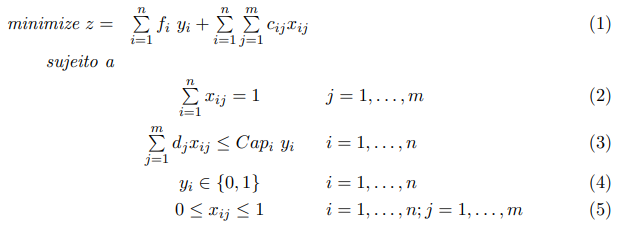

In [2]:

# I = Dados 
# J = Dados
# d = demanda
# M = capacidade
# f = custo fixo
# c = custo variavel 
def flp(I, J, d, M, f, c):
    # Criação do modelo
    model = gp.Model("flp")

    # Variáveis de decisão
    x, y = {}, {}

    # Adiciona variáveis binárias y[i] para indicar se a instalação i está aberta
    for i in I:
        y[i] = model.addVar(vtype=gp.GRB.BINARY, name="y(%s)" % (i))

    # Adiciona variáveis contínuas x[i, j] para representar a fração da demanda da i atendida por j
    for i in I:
        for j in J:
            x[i, j] = model.addVar(vtype=gp.GRB.CONTINUOUS, name="x(%s,%s)" % (i, j))

    # Restrições
    # Cada demanda deve ser atendida por exatamente uma instalação
    for j in J:
        model.addCons(gp.quicksum(x[i, j] for i in I) == 1, "Demand(%s)" % (j))

    # A demanda de cada instalação não pode exceder sua capacidade se estiver aberta
    for i in I:
        model.addCons(gp.quicksum(d[j] * x[i, j] for j in J) <= M[i] * y[i], "Capacity(%s)" % (i))

    # Garante que as variáveis x[i, j] estejam no intervalo correto
    for i in I:
        for j in J:
            model.addCons(x[i, j] >= 0, "NonNeg(%s,%s)" % (i, j))
            model.addCons(x[i, j] <= 1, "UpperBound(%s,%s)" % (i, j))

    # Função Objetivo
    # Minimiza os custos de abertura de instalações e os custos de atendimento das demandas
    model.setObjective(gp.quicksum(f[i] * y[i] for i in I) + gp.quicksum(x[i, j] * c[i, j] for i in I for j in J),
                       gp.GRB.MINIMIZE)

    # Otimiza o modelo
    model.optimize()

    # Retorna o modelo
    return model


SyntaxError: expected ':' (4271821761.py, line 2)